In [1]:
# custom operadores de optimizacion
from repository.metaheuristic.simulated_annealing import simulated_annealing, sa_cooling_operator, linear_multiplicative_cooling

# custom modelos de datos y problema
from models.instance_model import Instance
from models.patient_model import Patient
from models.vehicle_model import Vehicle
from models.travel_model import Travel

# custom cargadores de datos
from loaders.patient_loader import Patient_Loader
from loaders.vehicle_loader import Vehicle_Loader

# third party libraries
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from typing import Any

## DataFrames

In [2]:
#cargamos a los pacientes
patient_loader = Patient_Loader()
patients_list = patient_loader('./data/data_patients.json')
patients_dict = [patient.to_json() for patient in patients_list]
patient_df: pd.DataFrame = pd.DataFrame(patients_dict)
patient_df

,_id,x_loc,y_loc,a_tw,b_tw,demand,isAttended,vehicle,serviceTime,isWarehouse
0,0,90.0,85.0,4.0,15.0,0.0,False,None,0.0,True
1,1,75.0,76.0,7.0,24.0,10.0,False,None,0.3,False
2,2,96.0,44.0,0.0,24.0,30.0,False,None,0.3,False
3,3,50.0,5.0,0.0,7.0,10.0,False,None,0.3,False
4,4,49.0,8.0,7.0,24.0,10.0,False,None,0.3,False
5,5,13.0,7.0,7.0,24.0,10.0,False,None,0.3,False
6,6,29.0,89.0,0.0,7.0,20.0,False,None,0.3,False
7,7,58.0,30.0,0.0,24.0,20.0,False,None,0.3,False
8,8,70.0,39.0,0.0,24.0,20.0,False,None,0.3,False
9,9,14.0,24.0,0.0,24.0,10.0,False,None,0.3,False


In [3]:
whare_house: Patient = patients_list[0]

In [4]:
vehicle_loader = Vehicle_Loader()
vehicles_list: list[Vehicle]  = vehicle_loader(path_file='./data/data_vehicles.json', wharehouse=whare_house)
vehicles_dict: list[dict] = [vehicle.to_json() for vehicle in vehicles_list]
vehicle_df: pd.DataFrame = pd.DataFrame(vehicles_dict)
vehicle_df[vehicle_df.columns[:len(vehicle_df.columns) - 1]]

,id,MAX_Q,MIN_Q,q,x_location,y_location,WARE_HOUSE_id,VD,FLETE,t,CC,EM,is_assigned,total_distance
0,0,80.0,0.0,80.0,90.0,85.0,0,40.0,15.0,4.0,0.35,2.7,False,0
1,1,80.0,0.0,80.0,90.0,85.0,0,40.0,15.0,4.0,0.35,2.7,False,0
2,2,80.0,0.0,80.0,90.0,85.0,0,40.0,15.0,4.0,0.35,2.7,False,0


## Dibujar grafo

In [5]:
def draw_graph(patients: list[Patient], node_size: int = 300):
    #graph setup
    G: nx.Graph() = nx.Graph()
    nodes: list = []
    for patient in patients:
        attributes = patient.to_json()
        if patient._id == 0:
            attributes['color'] = 'lightblue'
        else:
            attributes['color'] = 'lightgreen'
        nodes.append(
            (patient._id, attributes)
        )
    G.add_nodes_from(nodes)
    edges: list = []
    for patient1 in patients:
        for patient2 in patients:
            if patient1._id !=  patient2._id:
                edges.append((patient1._id, patient2._id))

    G.add_edges_from(edges)
    colors: list = [node[1]['color'] for node in G.nodes(data=True)] 
    # drawing
    ax = plt.figure().gca()
    ax.set_axis_off()
    options: dict = {"node_size": node_size, "node_color": colors}
    positions: dict = { node._id: [node.loc.x, node.loc.y] for node in patients}
    nx.draw_networkx(G, positions, with_labels=True, **options)

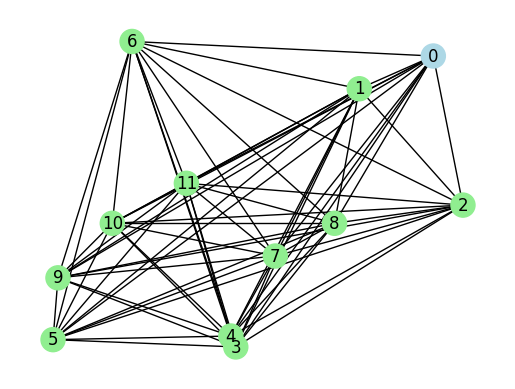

In [6]:

draw_graph(patients= patients_list)



## Primera solución

In [7]:
# creamos una instancia x del problema
x = Instance(vehicles= vehicles_list, patients= patients_list)

In [8]:
# encontramos la solución inicial
x.find_inital_solution()

0 [0]
0 [0, 1]
0 [0, 1, 2]
0 [0, 1, 2, 8]
0 [0, 1, 2, 8, 7]
[]
1 [0]
1 [0, 11]
1 [0, 11, 10]
1 [0, 11, 10, 6]
1 [0, 11, 10, 6, 9]
1 [0, 11, 10, 6, 9, 4]
1 [0, 11, 10, 6, 9, 4, 3]
[]
2 [0]
2 [0, 5]


In [9]:
x.get_output()

{'vehicle_count': 3,
 'distance': 707.6746738945417,
 'results': [{'id': 0,
   'MAX_Q': 80.0,
   'MIN_Q': 0.0,
   'q': 80.0,
   'x_location': 90.0,
   'y_location': 85.0,
   'WARE_HOUSE_id': 0,
   'VD': 40.0,
   'FLETE': 15.0,
   't': 9.221908294300619,
   'CC': 0.35,
   'EM': 2.7,
   'is_assigned': False,
   'total_distance': 160.87633177202477,
   'service_route': [{'is_warehouse': True,
     'vehicle_id': 0,
     'patient_id': 0,
     'travel_distance': 0,
     'travel_time': 4.0,
     'arrival_time': 4.0,
     'wait_time': 0,
     'service_time': 0,
     'departure_time': 4.0,
     'total_distance': 0,
     'capacity': 80.0,
     'loc_x': 90.0,
     'loc_y': 85.0},
    {'is_warehouse': False,
     'vehicle_id': 0,
     'patient_id': 1,
     'travel_distance': 17.4928556845359,
     'travel_time': 0.4373213921133975,
     'arrival_time': 4.437321392113398,
     'wait_time': 0,
     'service_time': 0.3,
     'departure_time': 4.737321392113397,
     'total_distance': 17.4928556845359

In [10]:
def get_routes(solution: Instance): 
    results = []
    for r in solution.get_output()['results']: # for each vehicle
        for t in r['service_route']:  # for each patient in its route
            t['vehicle'] = r['id'] # <- vehicle
            t['patient_id'] = t['patient_id'] # <- patient
            t['x'] = t['loc_x'] # <- patient.x
            t['y'] = t['loc_y']  # <- patient.y
            results.append(t)
    return results

def get_DataFrame(routes:list):
    return pd.DataFrame(routes)


In [11]:
df_routes = get_DataFrame(get_routes(x))

In [12]:
df_routes

,is_warehouse,vehicle_id,patient_id,travel_distance,travel_time,arrival_time,wait_time,service_time,departure_time,total_distance,capacity,loc_x,loc_y,vehicle,x,y
0,True,0,0,0.000000,4.000000,4.000000,0,0.0,4.000000,0.000000,80.0,90.0,85.0,0,90.0,85.0
1,False,0,1,17.492856,0.437321,4.437321,0,0.3,4.737321,17.492856,70.0,75.0,76.0,0,75.0,76.0
2,False,0,2,38.275318,0.956883,5.694204,0,0.3,5.994204,55.768174,40.0,96.0,44.0,0,96.0,44.0
3,False,0,8,26.476405,0.661910,6.656114,0,0.3,6.956114,82.244579,20.0,70.0,39.0,0,70.0,39.0
4,False,0,7,15.000000,0.375000,7.331114,0,0.3,7.631114,97.244579,0.0,58.0,30.0,0,58.0,30.0
5,True,0,0,63.631753,1.590794,9.221908,0,0.0,0.000000,160.876332,80.0,90.0,85.0,0,90.0,85.0
6,True,1,0,0.000000,4.000000,4.000000,0,0.0,4.000000,0.000000,80.0,90.0,85.0,1,90.0,85.0
7,False,1,11,61.032778,1.525819,5.525819,0,0.3,5.825819,61.032778,70.0,40.0,50.0,1,40.0,50.0
8,False,1,10,18.601075,0.465027,6.290846,0,0.3,6.590846,79.633853,60.0,25.0,39.0,1,25.0,39.0
9,False,1,6,50.159745,1.253994,7.844840,0,0.3,8.144840,129.793598,40.0,29.0,89.0,1,29.0,89.0


In [13]:
df_routes[df_routes['patient_id'] == 0]['patient_id']
 

0     0
5     0
6     0
13    0
14    0
16    0
Name: patient_id, dtype: int64

In [14]:
def generate_html_colors(n : int):
    def htmlcolor():
        import random
        color = "#%06x" % random.randint(0, 0xFFFFFF)
        return color
    if n == 1:
        return htmlcolor()
    return [ htmlcolor() for i in range(0, n)]

In [15]:
generate_html_colors(n= 5)

['#3e110d', '#4d2f21', '#97f084', '#c622f1', '#535729']

In [16]:
def draw_graph(df: pd.DataFrame):
    G = nx.Graph()
    vehicles = df['vehicle'].unique() # sets
    patients = df['patient_id'].unique() # sets
    nodes = []
    html_colors = generate_html_colors(vehicles.shape[0])
    for i, vehicle in enumerate(vehicles):
        attributes = {'color': html_colors[vehicle]}
        for patient in df_routes[df_routes['vehicle'] == vehicle]['patient_id']:
            nodes.append((patient, attributes))
    G.add_nodes_from(nodes)
    edges: list = []
    for i, vehicle in enumerate(vehicles):
        color =  html_colors[vehicle]
        route = list(df_routes[df_routes['vehicle'] == vehicle]['patient_id'])
        print(route)
        for j, patient in enumerate(route):
            if j > 0:
                if route[j-1] == route[j]:
                    continue
                print((route[j-1],route[j], color))
                edges.append((route[j-1],route[j], color))
            
    G.add_edges_from([(edge[0], edge[1]) for edge in edges])


    colors = [node[1]['color'] for node in G.nodes(data=True)] 
    edge_colors = [edge[2] for edge in edges]

    ax = plt.figure().gca()
    ax.set_axis_off()
    print([edge[2] for edge in edges])
    options = {"node_size": 300, "node_color": colors}
    positions: dict = { node._id: [node.loc.x, node.loc.y] for node in patients_list}
    nx.draw_networkx(G, positions, with_labels=True, **options)

[0, 1, 2, 8, 7, 0]
(0, 1, '#0f00b4')
(1, 2, '#0f00b4')
(2, 8, '#0f00b4')
(8, 7, '#0f00b4')
(7, 0, '#0f00b4')
[0, 11, 10, 6, 9, 4, 3, 0]
(0, 11, '#6c97a1')
(11, 10, '#6c97a1')
(10, 6, '#6c97a1')
(6, 9, '#6c97a1')
(9, 4, '#6c97a1')
(4, 3, '#6c97a1')
(3, 0, '#6c97a1')
[0, 5, 0]
(0, 5, '#f6f4dc')
(5, 0, '#f6f4dc')
['#0f00b4', '#0f00b4', '#0f00b4', '#0f00b4', '#0f00b4', '#6c97a1', '#6c97a1', '#6c97a1', '#6c97a1', '#6c97a1', '#6c97a1', '#6c97a1', '#f6f4dc', '#f6f4dc']


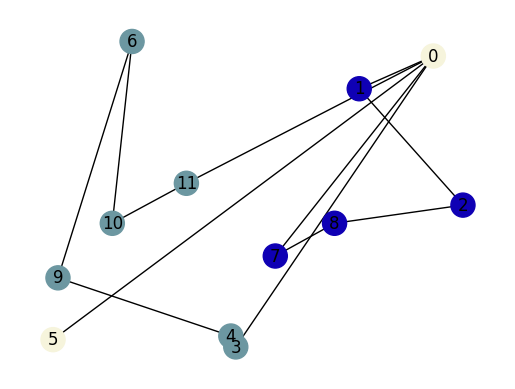

In [17]:
draw_graph(df= df_routes)

In [18]:
sa = simulated_annealing(
    x0= x,
    cooling_operator= linear_multiplicative_cooling(t_max= 100, alpha= 0.8),
    step_max= 10000,
    t_min= 0,
    t_max= 100
)

In [19]:
sa.solve()

In [20]:
sa.draw_energy_plot()

In [21]:
sa.results()

results: 
{
	cost:  432.78250744558966
	initial_temp: 100
	final_temp: 0.012499687507812303
	max_steps: 10000
	final_step: 10000
	final_energy: 432.78250744558966
}


In [24]:
df_routes = get_DataFrame(get_routes(sa.x_best))

In [25]:
df_routes

,is_warehouse,vehicle_id,patient_id,travel_distance,travel_time,arrival_time,wait_time,service_time,departure_time,total_distance,capacity,loc_x,loc_y,vehicle,x,y
0,True,0,0,0.000000,4.000000,4.000000,0.0,4.0,4.000000,0.000000,80.0,90.0,85.0,0,90.0,85.0
1,False,0,2,41.436699,1.035917,5.035917,0.0,0.3,5.335917,41.436699,50.0,96.0,44.0,0,96.0,44.0
2,False,0,8,26.476405,0.661910,5.997828,0.0,0.3,6.297828,67.913103,30.0,70.0,39.0,0,70.0,39.0
3,False,0,7,15.000000,0.375000,6.672828,0.0,0.3,6.972828,82.913103,10.0,58.0,30.0,0,58.0,30.0
4,False,0,1,49.040799,1.226020,8.198848,0.0,0.3,8.498848,131.953903,0.0,75.0,76.0,0,75.0,76.0
5,False,0,0,17.492856,0.437321,8.936169,0.0,0.0,8.936169,149.446758,0.0,90.0,85.0,0,90.0,85.0
6,True,1,0,0.000000,4.000000,4.000000,0.0,4.0,4.000000,0.000000,80.0,90.0,85.0,1,90.0,85.0
7,False,1,4,87.235314,2.180883,6.180883,0.0,0.3,6.480883,87.235314,70.0,49.0,8.0,1,49.0,8.0
8,False,1,3,3.162278,0.079057,6.559940,0.0,0.3,6.859940,90.397592,60.0,50.0,5.0,1,50.0,5.0
9,False,1,5,37.054015,0.926350,7.786290,0.0,0.3,8.086290,127.451606,50.0,13.0,7.0,1,13.0,7.0


In [26]:
df_routes[df_routes['patient_id'] == 0]['patient_id']

0     0
5     0
6     0
14    0
15    0
16    0
Name: patient_id, dtype: int64

[0, 2, 8, 7, 1, 0]
(0, 2, '#0bc851')
(2, 8, '#0bc851')
(8, 7, '#0bc851')
(7, 1, '#0bc851')
(1, 0, '#0bc851')
[0, 4, 3, 5, 9, 10, 11, 6, 0]
(0, 4, '#2a2edb')
(4, 3, '#2a2edb')
(3, 5, '#2a2edb')
(5, 9, '#2a2edb')
(9, 10, '#2a2edb')
(10, 11, '#2a2edb')
(11, 6, '#2a2edb')
(6, 0, '#2a2edb')
[0, 0]
['#0bc851', '#0bc851', '#0bc851', '#0bc851', '#0bc851', '#2a2edb', '#2a2edb', '#2a2edb', '#2a2edb', '#2a2edb', '#2a2edb', '#2a2edb', '#2a2edb']


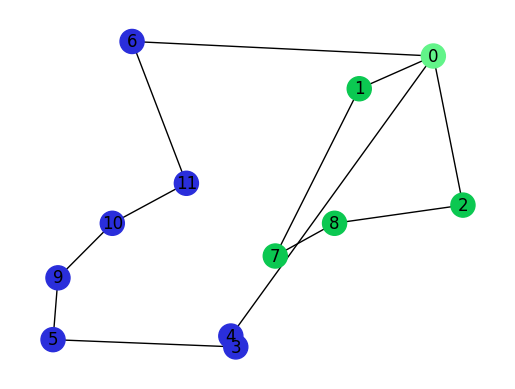

In [28]:
draw_graph(df= df_routes)